In [34]:
import emotion_detection as ed

# charger le modèle Inception ResNet entrainé sur le dataset FER+
model = ed.models.load_default_model(ed.models.PRESET_ResNet_FERplus)

image_detector = ed.ImageEmotionDetector(model=model, face_detection_method=ed.MTCNN)
video_detector = ed.VideoEmotionDetector(image_emotion_detector=image_detector,
                                         logging=True)
# objet capture vidéo
video = ed.VideCapture(ed.FIRST_CAMERA, width=600, height=400, fps=60)

In [50]:
image_detector.face_detection_method = ed.MTCNN
res = image_detector('C:/Users/Mohamed/Pictures/emotions 3.png')

2/2 [==============================] - 0s 33ms/step


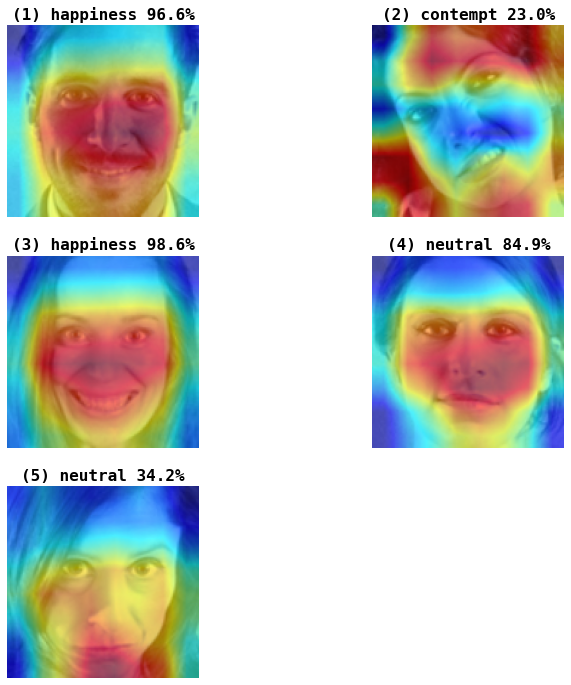

,anger,disgust,fear,happiness,neutral,sadness,surprise,contempt,unknown
image 1,0.00%,0.00%,0.00%,97.00%,1.00%,0.00%,0.00%,0.00%,1.00%
image 2,17.00%,21.00%,2.00%,7.00%,13.00%,4.00%,3.00%,23.00%,10.00%
image 3,0.00%,0.00%,0.00%,99.00%,0.00%,0.00%,1.00%,0.00%,0.00%
image 4,1.00%,0.00%,0.00%,4.00%,85.00%,3.00%,1.00%,2.00%,3.00%
image 5,2.00%,3.00%,2.00%,3.00%,34.00%,17.00%,4.00%,20.00%,14.00%


In [56]:
for image in res['square_images']:
    image[:,:,:]=image[:,::-1,:]
res.show_cam_heatmaps(model, argmax_cam=True, update_predictions=True)
res.show_dataframe()

In [40]:
image_detector.face_detection_method=ed.HARR_CASCADE
video_detector.logging = False
log = video_detector.detect(video)

In [3]:
log.scroll_through_results()

press 4 to show previous image
press 6 to show next image
press 8 and 2 to scroll through faces
press 0 to exit


In [3]:
video.play()

In [ ]:
import emotion_detection as ed
# CHARGER LE MODELE -----------------------------------------------------------
# charger le modèle Inception ResNet entrainé sur le dataset FER+
model = ed.models.load_default_model(ed.models.PRESET_ResNet_FERplus)
# Ou bien charger un autre modèle en spécifiant les paramètres suivants
model = load_model('model.h5')
model.emotions = ['happy', 'sad', 'surprise', ...]
model.preprocessing = lambda x : x / 255.0
# nom des couches du modèle (s'il est compatible avec CAM)
model.model.cam_layers = [
    'conv_68_activation', # derniere couche avant Global-Average-Pooling
    'global_average_pool', # couhce Global-Average-Pooling
    'output', # couche de sortie
]
#------------------------------------------------------------------------------
image_detector = ed.ImageEmotionDetector(model=model, 
                                         face_detection_method=ed.MTCNN)
res = image_detector('C:/Users/.../Pictures/emotions 3.png')

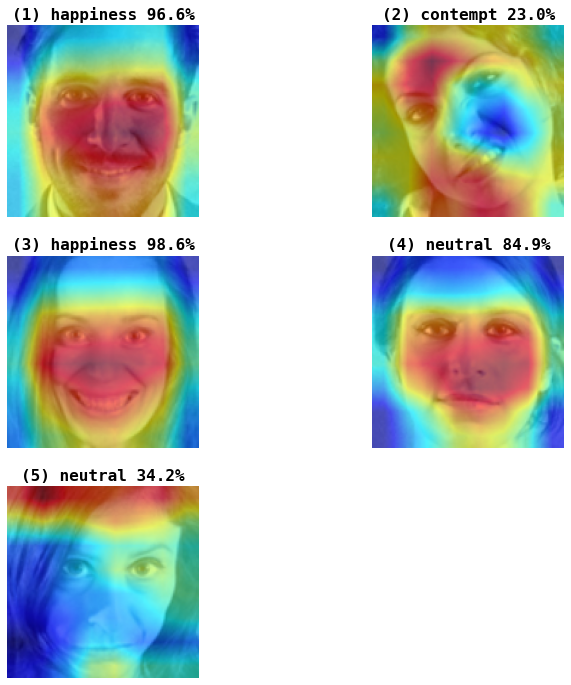

In [63]:
res.show_cam_heatmaps(
    model, 
    # choisir comment calculer les activations CAM pour
    # True,  pour prendre uniquement le CAM de la classe maximale
    # False, pour prendre la somme pondérée des activation CAM, en utilisant
    # (les probabilités des classes sont utilisés pour la pondération)
    argmax_cam=True, 
)